In [29]:
from binance.client import Client

api_key = 'QOmbpvHliXwmFAjQ20DjKzvEZBFgX6d3WveUJBxfnrWS14zC068jPWQaJhU8rddm'
secret_key = 'vbCZKbuu7hfnuA5k1SCDNeoyxv6J141dmbcvWCUmQRk2a0i9fYmsqd7vNBpz5tzY'

client = Client(api_key, secret_key, testnet=True)

order = client.create_order(
    symbol='BTCUSDT',
    side='BUY',
    type='MARKET',
    quantity=0.005
)

print(order)


{'symbol': 'BTCUSDT', 'orderId': 8746139, 'orderListId': -1, 'clientOrderId': 'd6Fajz7Bw45QAw6LYa53TJ', 'transactTime': 1722622549820, 'price': '0.00000000', 'origQty': '0.00500000', 'executedQty': '0.00500000', 'cummulativeQuoteQty': '315.30105000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'workingTime': 1722622549820, 'fills': [{'price': '63060.21000000', 'qty': '0.00500000', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 2026825}], 'selfTradePreventionMode': 'EXPIRE_MAKER'}


In [16]:
from binance.client import Client
from binance.enums import *

# Your Binance Testnet API key and secret
api_key = 'QOmbpvHliXwmFAjQ20DjKzvEZBFgX6d3WveUJBxfnrWS14zC068jPWQaJhU8rddm'
secret_key = 'vbCZKbuu7hfnuA5k1SCDNeoyxv6J141dmbcvWCUmQRk2a0i9fYmsqd7vNBpz5tzY'

# Initialize the Binance client
client = Client(api_key, secret_key, testnet=True)

# Fetch account details
account_info = client.get_account()
balances = account_info['balances']

# Print portfolio details
print("Portfolio Details:")
for balance in balances:
    asset = balance['asset']
    free = balance['free']
    locked = balance['locked']
    print(f"Asset: {asset}, Free: {free}, Locked: {locked}")

# Set initial cash (manually for simulation purposes)
initial_cash = 10000  # Example: 10,000 USDT

# Check if USDT is available in the portfolio
usdt_balance = next((item for item in balances if item['asset'] == 'USDT'), None)
if usdt_balance:
    usdt_balance['free'] = str(float(usdt_balance['free']) + initial_cash)
else:
    balances.append({'asset': 'USDT', 'free': str(initial_cash), 'locked': '0.00000000'})

# Print updated portfolio details with initial cash
print("\nUpdated Portfolio Details with Initial Cash:")
for balance in balances:
    asset = balance['asset']
    free = balance['free']
    locked = balance['locked']
    print(f"Asset: {asset}, Free: {free}, Locked: {locked}")


Portfolio Details:
Asset: ETH, Free: 1.00000000, Locked: 0.00000000
Asset: BTC, Free: 1.00100000, Locked: 0.00000000
Asset: LTC, Free: 5.00000000, Locked: 0.00000000
Asset: BNB, Free: 1.00000000, Locked: 0.00000000
Asset: USDT, Free: 9936.71021000, Locked: 0.00000000
Asset: TRX, Free: 4386.00000000, Locked: 0.00000000
Asset: XRP, Free: 948.00000000, Locked: 0.00000000
Asset: NEO, Free: 33.00000000, Locked: 0.00000000
Asset: QTUM, Free: 141.00000000, Locked: 0.00000000
Asset: EOS, Free: 617.00000000, Locked: 0.00000000
Asset: SNT, Free: 14258.00000000, Locked: 0.00000000
Asset: BNT, Free: 606.00000000, Locked: 0.00000000
Asset: GAS, Free: 98.00000000, Locked: 0.00000000
Asset: LRC, Free: 1850.00000000, Locked: 0.00000000
Asset: ZRX, Free: 931.00000000, Locked: 0.00000000
Asset: KNC, Free: 749.00000000, Locked: 0.00000000
Asset: IOTA, Free: 2187.00000000, Locked: 0.00000000
Asset: LINK, Free: 28.00000000, Locked: 0.00000000
Asset: XVG, Free: 18446.00000000, Locked: 0.00000000
Asset: MTL,

In [30]:
from binance.client import Client

api_key = 'QOmbpvHliXwmFAjQ20DjKzvEZBFgX6d3WveUJBxfnrWS14zC068jPWQaJhU8rddm'
secret_key = 'vbCZKbuu7hfnuA5k1SCDNeoyxv6J141dmbcvWCUmQRk2a0i9fYmsqd7vNBpz5tzY'

client = Client(api_key, secret_key, testnet=True)

def get_holdings(client):
    account_info = client.get_account()
    balances = account_info['balances']
    holdings = {balance['asset']: float(balance['free']) + float(balance['locked']) for balance in balances if float(balance['free']) + float(balance['locked']) > 0}
    return holdings

holdings = get_holdings(client)
print("Holdings:")
for asset, amount in holdings.items():
    print(f"{asset}: {amount}")

def get_transactions(client, symbol):
    trades = client.get_my_trades(symbol=symbol)
    return trades

# Example: Check transactions for BTCUSDT
transactions = get_transactions(client, 'BTCUSDT')
print("\nTransactions for BTCUSDT:")
for trade in transactions:
    print(f"ID: {trade['id']}, Symbol: {trade['symbol']}, Order ID: {trade['orderId']}, Price: {trade['price']}, Qty: {trade['qty']}, Quote Qty: {trade['quoteQty']}, Time: {trade['time']}, Is Buyer: {trade['isBuyer']}, Is Maker: {trade['isMaker']}, Commission: {trade['commission']}, Commission Asset: {trade['commissionAsset']}")

Holdings:
ETH: 1.0
BTC: 1.007
LTC: 5.0
BNB: 1.0
USDT: 9558.00163
TRX: 4386.0
XRP: 948.0
NEO: 33.0
QTUM: 141.0
EOS: 617.0
SNT: 14258.0
BNT: 606.0
GAS: 98.0
LRC: 1850.0
ZRX: 931.0
KNC: 749.0
IOTA: 2187.0
LINK: 28.0
XVG: 18446.0
MTL: 319.0
ETC: 16.0
ZEC: 18.0
AST: 3298.0
DASH: 16.0
OAX: 2070.0
REQ: 3560.0
VIB: 5195.0
POWR: 1678.0
ENJ: 1656.0
STORJ: 933.0
KMD: 1154.0
NULS: 833.0
BAT: 2028.0
LSK: 332.0
MANA: 1073.0
ADX: 2365.0
ADA: 1086.0
XLM: 4692.0
ICX: 2308.0
ELF: 1033.0
RLC: 148.0
PIVX: 1330.0
STEEM: 1867.0
BLZ: 1978.0
ZIL: 18446.0
ONT: 1667.0
WAN: 1959.0
SYS: 2502.0
LOOM: 6051.0
TUSD: 10000.0
ZEN: 53.0
THETA: 226.0
IOTX: 7882.0
QKC: 18446.0
DATA: 7749.0
SC: 18446.0
DENT: 18446.0
ARDR: 5439.0
HOT: 18446.0
VET: 14251.0
DOCK: 16156.0
RVN: 17291.0
DCR: 24.0
REN: 6698.0
USDC: 10000.0
ONG: 1159.0
FET: 231.0
IOST: 18446.0
CELR: 18446.0
MATIC: 700.0
ATOM: 58.0
PHB: 178.0
TFUEL: 5273.0
ONE: 18446.0
FTM: 597.0
ALGO: 2672.0
DOGE: 3070.0
DUSK: 1114.0
ANKR: 11541.0
WIN: 18446.0
COS: 18446.0
KEY: 18

In [32]:
from binance.client import Client

api_key = 'QOmbpvHliXwmFAjQ20DjKzvEZBFgX6d3WveUJBxfnrWS14zC068jPWQaJhU8rddm'
secret_key = 'vbCZKbuu7hfnuA5k1SCDNeoyxv6J141dmbcvWCUmQRk2a0i9fYmsqd7vNBpz5tzY'

client = Client(api_key, secret_key, testnet=True)

def get_holdings(client, base_currency='USDT'):
    account_info = client.get_account()
    balances = account_info['balances']
    prices = get_latest_prices(client)
    
    holdings_info = []
    for balance in balances:
        asset = balance['asset']
        free_balance = float(balance['free'])
        locked_balance = float(balance['locked'])
        total_balance = free_balance + locked_balance

        if total_balance > 0:
            symbol = asset + base_currency
            current_price = prices.get(symbol, None)
            
            if current_price:
                market_value = total_balance * current_price
                # Assuming we have a way to get the cost basis; using current price for now as placeholder
                # In practice, this would be the average purchase price or an actual value from your records
                cost_basis = current_price  # Placeholder: You should replace this with the actual cost basis
                profit_loss = market_value - (total_balance * cost_basis)
                
                holdings_info.append({
                    'symbol': asset,
                    'quantity': total_balance,
                    'current_price': current_price,
                    'market_value': market_value,
                    'profit_loss': profit_loss
                })
            else:
                print(f"Price for {symbol} not found, skipping.")

    return holdings_info

def get_latest_prices(client):
    prices = client.get_all_tickers()
    price_dict = {price['symbol']: float(price['price']) for price in prices}
    return price_dict

def get_total_cash(client, base_currency='USDT'):
    holdings = get_holdings(client, base_currency=base_currency)
    
    total_cash = 0.0
    for holding in holdings:
        if holding['symbol'] == base_currency:
            total_cash += holding['market_value']
    
    return total_cash

def get_total_equity(client, base_currency='USDT'):
    holdings = get_holdings(client, base_currency=base_currency)
    
    total_equity = 0.0
    for holding in holdings:
        total_equity += holding['market_value']
    
    return total_equity

total_cash = get_total_cash(client)
print(f"Total Cash Value in USDT: {total_cash:.2f}")

total_equity = get_total_equity(client)
print(f"Total Equity Value in USDT: {total_equity:.2f}")

# Display holdings information
holdings = get_holdings(client)
for holding in holdings:
    print(f"Symbol: {holding['symbol']}, Quantity: {holding['quantity']:.6f}, Current Price: {holding['current_price']:.6f}, Market Value: {holding['market_value']:.2f}, Profit/Loss: {holding['profit_loss']:.2f}")


Price for USDTUSDT not found, skipping.
Price for TRYUSDT not found, skipping.
Price for ZARUSDT not found, skipping.
Price for IDRTUSDT not found, skipping.
Price for UAHUSDT not found, skipping.
Price for DAIUSDT not found, skipping.
Price for BRLUSDT not found, skipping.
Price for PLNUSDT not found, skipping.
Price for RONUSDT not found, skipping.
Price for ARSUSDT not found, skipping.
Price for JPYUSDT not found, skipping.
Price for MXNUSDT not found, skipping.
Price for CZKUSDT not found, skipping.
Total Cash Value in USDT: 0.00
Price for USDTUSDT not found, skipping.
Price for TRYUSDT not found, skipping.
Price for ZARUSDT not found, skipping.
Price for IDRTUSDT not found, skipping.
Price for UAHUSDT not found, skipping.
Price for DAIUSDT not found, skipping.
Price for BRLUSDT not found, skipping.
Price for PLNUSDT not found, skipping.
Price for RONUSDT not found, skipping.
Price for ARSUSDT not found, skipping.
Price for JPYUSDT not found, skipping.
Price for MXNUSDT not found, 

In [47]:
from flask import jsonify
def get_latest_prices(client, symbol):
    prices = client.get_all_tickers()
    price_dict = {price['symbol']: float(price['price']) for price in prices}

    # Check if the symbol exists in the price dictionary
    if symbol not in price_dict:
        raise ValueError(f"Unable to fetch price for the symbol '{symbol}'")

    # Get the price for the specified symbol
    price = price_dict[symbol]

    # Return the price as JSON
    return jsonify({'symbol': symbol, 'price': price})

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load historical data
data = pd.read_csv("check1.csv", index_col='Datetime', parse_dates=True)
data['Prediction'] = data['Prediction'].replace(1, 2)
data['Prediction'] = data['Prediction'].replace(0, 2)
data = data[0:20000]

# Initialize variables for backtesting
total_cash = 10000  # Total cash available in the account
initial_cash = 20   # Cash to be used per trade
cash = initial_cash
position = 0  # Number of shares held
trading_fee = 0.001  # 0.1% trading fee
slots = 1000  # Total slots available for trades
used_slots = 0  # Slots currently in use

# List to track portfolio value over time and trades
portfolio_values = []
trades = []
buy_signal_profits = {signal: 0 for signal in range(6)}  # To track profit for each buy signal
trade_pnls = []  # List to track PnL of each trade
trade_dates = []  # List to track the dates of each trade
trade_cash_earnings = []  # List to track exact cash earned/lost on each trade
trade_durations = []  # List to track the duration of each trade
trade_entry_times = []  # List to track the entry times of each trade

# Loop through the data
for i in range(len(data)):
    prediction = data['Prediction'].iloc[i]
    close_price = data['Close'].iloc[i]

    if prediction == 0 and position > 0:  # Sell signal
        sell_price = close_price
        cash_before_fee = position * sell_price
        fee = cash_before_fee * trading_fee
        total_cash += cash_before_fee - fee
        cash += cash_before_fee - fee
        pnl = (sell_price - buy_price) * position - fee
        position = 0
        used_slots -= 1  # Free up a slot after selling

        # Calculate exact cash earned/lost on this trade
        cash_earning = total_cash - 10000  # Track earnings relative to initial total cash
        trade_cash_earnings.append((data.index[i], cash_earning))

        # Calculate the duration of the trade
        trade_duration = data.index[i] - trade_entry_times[-1]
        trade_durations.append(trade_duration)

        if trade_duration < pd.Timedelta(minutes=500):  # Only keep trades with duration < 500 minutes
            print(f"Selling at {sell_price} on {data.index[i]} - PnL: {pnl:.2f}, Fee: {fee:.2f}, Cash Earning: {cash_earning:.2f}")
            trades.append(('Sell', sell_price, data.index[i], cash_earning))
            trade_pnls.append(pnl)
            trade_dates.append(data.index[i])
        else:
            print(f"Trade duration {trade_duration} >= 500 minutes, trade discarded.")

    elif prediction in [2, 3, 4, 5] and cash > 0 and used_slots < slots:  # Buy signals
        if cash < initial_cash:
            cash = min(total_cash, initial_cash)  # Refuel cash if total cash permits

        if cash > 0:
            buy_price = close_price
            position = (cash / (1 + trading_fee)) / buy_price
            fee = cash * trading_fee
            total_cash -= cash  # Deduct from the total cash
            cash = 0
            used_slots += 1  # Use a slot after buying
            buy_signal = prediction  # Store the buy signal type
            trade_entry_times.append(data.index[i])  # Record the entry time
            print(f"Buying at {buy_price} on {data.index[i]} - Fee: {fee:.2f}")
            trades.append(('Buy', buy_price, data.index[i], buy_signal))

            # Calculate the target sell price
            target_sell_price = close_price + ((prediction + 1) * ((close_price / 100) * 0.124))

            # Look for the next candle that meets or exceeds the target sell price
            for j in range(i + 1, len(data)):
                future_close_price = data['Close'].iloc[j]
                if future_close_price >= target_sell_price:
                    sell_price = future_close_price
                    cash_before_fee = position * sell_price
                    fee = cash_before_fee * trading_fee
                    total_cash += cash_before_fee - fee
                    cash = cash_before_fee - fee
                    pnl = (sell_price - buy_price) * position - fee
                    position = 0
                    minutes = data.index[j] - data.index[i]
                    used_slots -= 1  # Free up a slot after selling
                    profit = pnl  # Calculate profit in cash
                    buy_signal_profits[buy_signal] += profit  # Track profit for the buy signal
                    trade_duration = data.index[j] - trade_entry_times[-1]  # Calculate the duration of the trade

                    if trade_duration < pd.Timedelta(minutes=500):  # Only keep trades with duration < 500 minutes
                        trade_durations.append(trade_duration)
                        print(f"Selling at {sell_price} on {data.index[j]} - PnL: {pnl:.2f}, Fee: {fee:.2f}, Profit: {profit:.2f}, Minutes: {minutes}")
                        trades.append(('Sell', sell_price, data.index[j]))
                        trade_pnls.append(pnl)
                        trade_dates.append(data.index[j])
                    else:
                        print(f"Trade duration {trade_duration} >= 500 minutes, trade discarded.")
                    break

    # Calculate current portfolio value
    current_value = total_cash + (position * close_price)
    portfolio_values.append(current_value)

# Final portfolio value
final_value = total_cash + (position * data['Close'].iloc[-1])
print(f"Final portfolio value: {final_value}")
print(f"Net profit: {final_value - 10000}")

# Convert portfolio values list to a pandas Series
portfolio_values = pd.Series(portfolio_values, index=data.index[:len(portfolio_values)])

# Calculate cumulative returns
cumulative_returns = portfolio_values.pct_change().add(1).cumprod().sub(1)

# Calculate drawdown
running_max = portfolio_values.cummax()
drawdown = (portfolio_values - running_max) / running_max

# Calculate volatility
volatility = portfolio_values.pct_change().std() * (252 ** 0.5)  # Annualized volatility assuming 252 trading days

# Calculate additional metrics
duration = data.index[-1] - data.index[0]
exposure_time = len(data[pd.notnull(portfolio_values)]) / len(data) * 100
buy_and_hold_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100
annual_return = ((final_value / 10000) ** (252 / len(data)) - 1) * 100
max_drawdown = drawdown.min() * 100
avg_drawdown = drawdown.mean() * 100
max_drawdown_duration = (drawdown[drawdown == drawdown.min()].index[0] - drawdown.cummin().idxmin()).days
avg_drawdown_duration = drawdown[drawdown < 0].mean()
win_rate = len([trade for trade in trades if trade[0] == 'Sell' and trade[1] > trades[trades.index(trade) - 1][1]]) / len([trade for trade in trades if trade[0] == 'Sell']) * 100
best_trade = max([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell'])
worst_trade = min([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell'])
avg_trade = sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell']) / len([trade for trade in trades if trade[0] == 'Sell'])
profit_factor = sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell' and trade[1] > trades[trades.index(trade) - 1][1]]) / -sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell' and trade[1] < trades[trades.index(trade) - 1][1]])
expectancy = avg_trade / initial_cash * 100
sqn = (avg_trade / volatility) * (len(trades) ** 0.5)
no_of_trades = len(trades)

# Calculate the number of days of trades
number_of_trading_days = (data.index[-1] - data.index[0]).total_seconds() / 3600

# Calculate the average trade duration
average_trade_duration = sum(trade_durations, pd.Timedelta(0)) / len(trade_durations)
maximum_trade_duration = max(trade_durations)

# Calculate the number of trades over 500 minutes
trades_over_500_minutes = len([duration for duration in trade_durations if duration >= pd.Timedelta(minutes=500)])

# Compile backtest report
backtest_report = {
    'Final Portfolio Value': final_value,
    'Net Profit': final_value - 10000,
    'Cumulative Return (%)': cumulative_returns[-1] * 100,
    'Max Drawdown': max_drawdown,
    'Average Drawdown': avg_drawdown,
    'Max Drawdown Duration (days)': max_drawdown_duration,
    'Average Drawdown Duration': avg_drawdown_duration,
    'Win Rate (%)': win_rate,
    'Best Trade': best_trade,
    'Worst Trade': worst_trade,
    'Average Trade': avg_trade,
    'Profit Factor': profit_factor,
    'Expectancy (%)': expectancy,
    'SQN': sqn,
    'Number of Trades': no_of_trades,
    'Exposure Time (%)': exposure_time,
    'Buy and Hold Return (%)': buy_and_hold_return,
    'Annual Return (%)': annual_return,
    'Volatility': volatility,
    'Duration': duration,
    'Max Trade Duration': maximum_trade_duration,
    'Number of Trades > 500 minutes': trades_over_500_minutes,
    'No. of Trading Days': number_of_trading_days,
    'Avg Trade Duration': average_trade_duration
}

# Write to a PDF report
with PdfPages("backtest_report.pdf") as pdf:
    plt.figure(figsize=(10, 6))
    portfolio_values.plot()
    plt.title("Portfolio Value Over Time")
    plt.xlabel("Time")
    plt.ylabel("Portfolio Value")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(10, 6))
    cumulative_returns.plot()
    plt.title("Cumulative Returns Over Time")
    plt.xlabel("Time")
    plt.ylabel("Cumulative Returns")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(10, 6))
    drawdown.plot()
    plt.title("Drawdown Over Time")
    plt.xlabel("Time")
    plt.ylabel("Drawdown")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(trade_pnls)), trade_pnls)
    plt.title("PnL of Each Trade")
    plt.xlabel("Trade")
    plt.ylabel("PnL")
    pdf.savefig()
    plt.close()

# Print the backtest report
for key, value in backtest_report.items():
    print(f"{key}: {value}")

print("Backtest complete.")


Buying at 58285.5 on 2024-08-15 08:40:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.07, Fee: 0.02, Profit: 0.07, Minutes: 0 days 01:06:00
Buying at 58318.53 on 2024-08-15 08:41:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.05, Fee: 0.02, Profit: 0.05, Minutes: 0 days 01:05:00
Buying at 58317.31 on 2024-08-15 08:42:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.05, Fee: 0.02, Profit: 0.05, Minutes: 0 days 01:04:00
Buying at 58311.5 on 2024-08-15 08:43:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.06, Fee: 0.02, Profit: 0.06, Minutes: 0 days 01:03:00
Buying at 58309.0 on 2024-08-15 08:44:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.06, Fee: 0.02, Profit: 0.06, Minutes: 0 days 01:02:00
Buying at 58324.09 on 2024-08-15 08:45:00+00:00 - Fee: 0.02
Selling at 58567.99 on 2024-08-15 11:26:00+00:00 - PnL: 0.06, Fee: 0.02, Profit: 0.

/tmp/ipykernel_637810/2129294151.py:143: RuntimeWarning: divide by zero encountered in scalar divide
  profit_factor = sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell' and trade[1] > trades[trades.index(trade) - 1][1]]) / -sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell' and trade[1] < trades[trades.index(trade) - 1][1]])
/tmp/ipykernel_637810/2129294151.py:162: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Cumulative Return (%)': cumulative_returns[-1] * 100,


Final Portfolio Value: 3649891675521782.5
Net Profit: 3649891675511782.5
Cumulative Return (%): 36498749989185.836
Max Drawdown: -1.9771324708774427
Average Drawdown: -0.16659907354785225
Max Drawdown Duration (days): 0
Average Drawdown Duration: -0.01166274466765747
Win Rate (%): 100.0
Best Trade: 761.1800000000003
Worst Trade: 212.6800000000003
Average Trade: 288.55799030008984
Profit Factor: inf
Expectancy (%): 1442.7899515004492
SQN: 1914186.4455202334
Number of Trades: 22246
Exposure Time (%): 100.0
Buy and Hold Return (%): 9.660738948795156
Annual Return (%): 59.30946812690725
Volatility: 0.02248406511833279
Duration: 10 days 00:11:00
Max Trade Duration: 0 days 08:19:00
Number of Trades > 500 minutes: 0
No. of Trading Days: 240.18333333333334
Avg Trade Duration: 0 days 01:59:53.519248257
Backtest complete.


Buying at 58285.5 on 2024-08-15 08:40:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.07, Fee: 0.02, Profit: 0.07, Minutes: 0 days 01:06:00
Buying at 58318.53 on 2024-08-15 08:41:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.05, Fee: 0.02, Profit: 0.05, Minutes: 0 days 01:05:00
Buying at 58317.31 on 2024-08-15 08:42:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.05, Fee: 0.02, Profit: 0.05, Minutes: 0 days 01:04:00
Buying at 58311.5 on 2024-08-15 08:43:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.06, Fee: 0.02, Profit: 0.06, Minutes: 0 days 01:03:00
Buying at 58309.0 on 2024-08-15 08:44:00+00:00 - Fee: 0.02
Selling at 58535.61 on 2024-08-15 09:46:00+00:00 - PnL: 0.06, Fee: 0.02, Profit: 0.06, Minutes: 0 days 01:02:00
Buying at 58324.09 on 2024-08-15 08:45:00+00:00 - Fee: 0.02
Selling at 58567.99 on 2024-08-15 11:26:00+00:00 - PnL: 0.06, Fee: 0.02, Profit: 0.

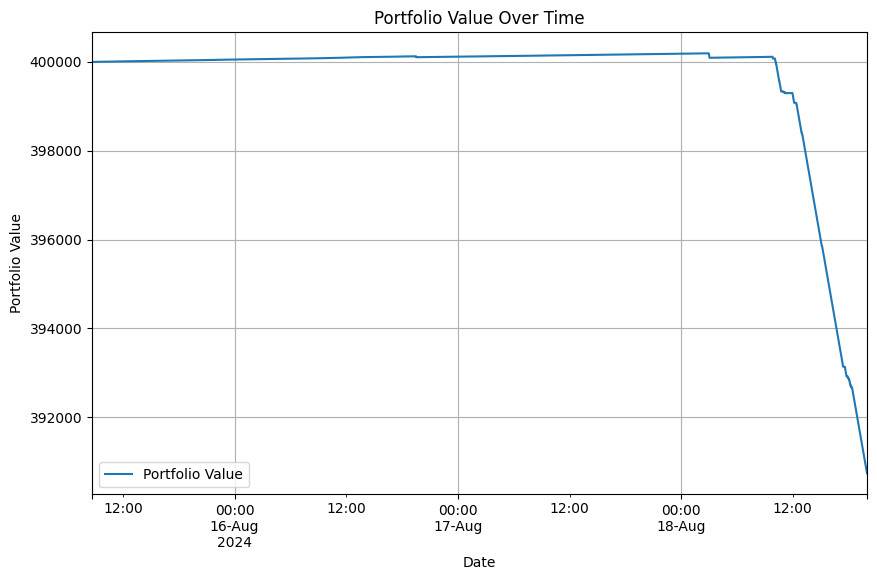

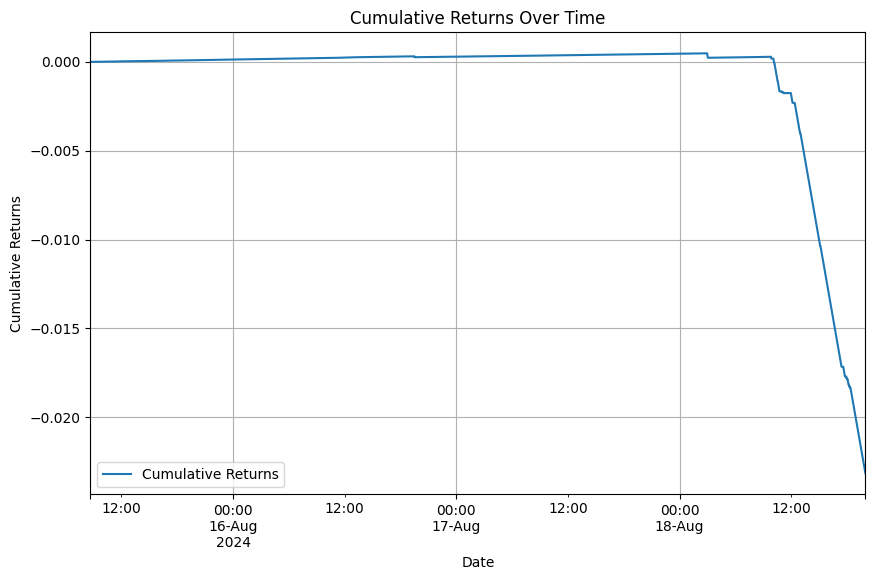

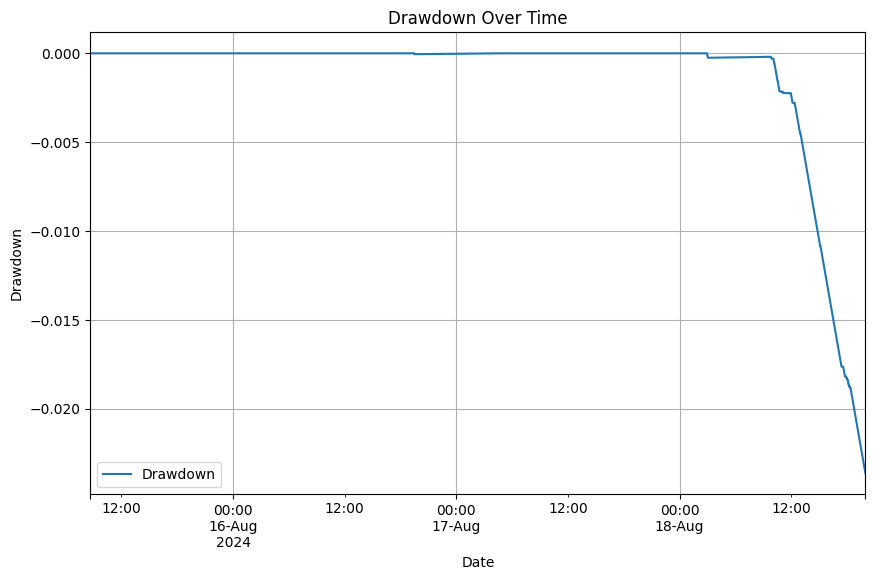

Initial Cash: 400000.00
Final Portfolio Value: 390740.37
Net Profit: -9259.63
Cumulative Returns: -0.02
Max Drawdown: -2.36
Avg. Drawdown: -0.13
Max Drawdown Duration (days): 0.00
Win Rate: 100.00
Best Trade: 606.62
Worst Trade: 212.68
Avg. Trade: 258.32
Profit Factor: inf
Expectancy: 0.06
SQN: 106810844.06
Volatility: 0.00
No. of Trades: 9524.00
Number of Trading Days: 83.32


TypeError: unsupported format string passed to Timedelta.__format__

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load historical data
data = pd.read_csv("check1.csv", index_col='Datetime', parse_dates=True)
data['Prediction'] = data['Prediction'].replace(1, 2)
data['Prediction'] = data['Prediction'].replace(0, 2)
data = data[0:5000]

# Initialize variables for backtesting
fixed_investment = 20  # Fixed investment per trade
cash = initial_cash = 20 * 20000  # Total initial cash assuming 20000 trades
position = 0  # Number of shares held
trading_fee = 0.001  # 0.1% trading fee
slots = 1000  # Total slots available for trades
used_slots = 0  # Slots currently in use

# List to track portfolio value over time and trades
portfolio_values = []
trades = []
buy_signal_profits = {signal: 0 for signal in range(6)}  # To track profit for each buy signal
trade_pnls = []  # List to track PnL of each trade
trade_dates = []  # List to track the dates of each trade
trade_cash_earnings = []  # List to track exact cash earned/lost on each trade
trade_durations = []  # List to track the duration of each trade
trade_entry_times = []  # List to track the entry times of each trade

# Loop through the data
for i in range(len(data)):
    prediction = data['Prediction'].iloc[i]
    close_price = data['Close'].iloc[i]

    if prediction == 0 and position > 0:  # Sell signal
        sell_price = close_price
        cash_before_fee = position * sell_price
        fee = cash_before_fee * trading_fee
        cash += cash_before_fee - fee
        pnl = (sell_price - buy_price) * position - fee
        position = 0
        used_slots -= 1  # Free up a slot after selling

        # Calculate exact cash earned/lost on this trade
        cash_earning = cash - initial_cash
        trade_cash_earnings.append((data.index[i], cash_earning))

        trade_pnls.append(pnl)
        trade_dates.append(data.index[i])

        # Calculate the duration of the trade
        trade_duration = data.index[i] - trade_entry_times[-1]
        trade_durations.append(trade_duration)

        print(f"Selling at {sell_price} on {data.index[i]} - PnL: {pnl:.2f}, Fee: {fee:.2f}, Cash Earning: {cash_earning:.2f}")
        trades.append(('Sell', sell_price, data.index[i], cash_earning))

    elif prediction in [2, 3, 4, 5] and cash >= fixed_investment and used_slots < slots:  # Buy signals
        buy_price = close_price
        position = fixed_investment / (1 + trading_fee) / buy_price
        fee = fixed_investment * trading_fee
        cash -= fixed_investment  # Deduct the fixed investment from cash
        used_slots += 1  # Use a slot after buying
        buy_signal = prediction  # Store the buy signal type
        trade_entry_times.append(data.index[i])  # Record the entry time
        print(f"Buying at {buy_price} on {data.index[i]} - Fee: {fee:.2f}")
        trades.append(('Buy', buy_price, data.index[i], buy_signal))

        # Calculate the target sell price
        target_sell_price = close_price + ((prediction+1) * ((close_price / 100) * 0.124))

        # Look for the next candle that meets or exceeds the target sell price
        for j in range(i + 1, len(data)):
            future_close_price = data['Close'].iloc[j]
            if future_close_price >= target_sell_price:
                sell_price = future_close_price
                cash_before_fee = position * sell_price
                fee = cash_before_fee * trading_fee
                cash += cash_before_fee - fee
                pnl = (sell_price - buy_price) * position - fee
                position = 0
                minutes = data.index[j] - data.index[i]
                used_slots -= 1  # Free up a slot after selling
                profit = pnl  # Calculate profit in cash
                buy_signal_profits[buy_signal] += profit  # Track profit for the buy signal
                trade_duration = data.index[j] - trade_entry_times[-1]  # Calculate the duration of the trade
                trade_durations.append(trade_duration)
                print(f"Selling at {sell_price} on {data.index[j]} - PnL: {pnl:.2f}, Fee: {fee:.2f}, Profit: {profit:.2f}, Minutes: {minutes}")
                trades.append(('Sell', sell_price, data.index[j]))
                break

    # Calculate current portfolio value
    current_value = cash + (position * close_price)
    portfolio_values.append(current_value)

# Final portfolio value
final_value = cash + (position * data['Close'].iloc[-1])
print(f"Final portfolio value: {final_value}")
print(f"Net profit: {final_value - initial_cash}")

# Convert portfolio values list to a pandas Series
portfolio_values = pd.Series(portfolio_values, index=data.index[:len(portfolio_values)])

# Calculate cumulative returns
cumulative_returns = portfolio_values.pct_change().add(1).cumprod().sub(1)

# Calculate drawdown
running_max = portfolio_values.cummax()
drawdown = (portfolio_values - running_max) / running_max

# Calculate volatility
volatility = portfolio_values.pct_change().std() * (252 ** 0.5)  # Annualized volatility assuming 252 trading days

# Calculate additional metrics
duration = data.index[-1] - data.index[0]
exposure_time = len(data[pd.notnull(portfolio_values)]) / len(data) * 100
buy_and_hold_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100
annual_return = ((final_value / initial_cash) ** (252 / len(data)) - 1) * 100
max_drawdown = drawdown.min() * 100
avg_drawdown = drawdown.mean() * 100
max_drawdown_duration = (drawdown[drawdown == drawdown.min()].index[0] - drawdown.cummin().idxmin()).days
avg_drawdown_duration = drawdown[drawdown < 0].mean()
win_rate = len([trade for trade in trades if trade[0] == 'Sell' and trade[1] > trades[trades.index(trade) - 1][1]]) / len([trade for trade in trades if trade[0] == 'Sell']) * 100
best_trade = max([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell'])
worst_trade = min([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell'])
avg_trade = sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell']) / len([trade for trade in trades if trade[0] == 'Sell'])
# Calculate the sums of winning and losing trades
winning_sum = sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell' and trade[1] > trades[trades.index(trade) - 1][1]])
losing_sum = -sum([trade[1] - trades[trades.index(trade) - 1][1] for trade in trades if trade[0] == 'Sell' and trade[1] < trades[trades.index(trade) - 1][1]])

# Calculate profit factor, avoiding division by zero
if losing_sum == 0:
    profit_factor = float('inf')  # No losing trades, set profit factor to infinity
else:
    profit_factor = winning_sum / losing_sum
expectancy = avg_trade / initial_cash * 100
sqn = (avg_trade / volatility) * (len(trades) ** 0.5)
no_of_trades = len(trades)

# Calculate the number of days of trades
number_of_trading_days = (data.index[-1] - data.index[0]).total_seconds() / 3600

# Calculate the average trade duration
average_trade_duration = sum(trade_durations, pd.Timedelta(0)) / len(trade_durations)
maximum_trade_duration = max(trade_durations)

# Calculate the number of trades with a duration >= 500 minutes
trades_over_500_minutes = len([duration for duration in trade_durations if duration >= pd.Timedelta(minutes=500)])

# Update backtest report with new metric
backtest_report = {
    'Initial Cash': initial_cash,
    'Final Portfolio Value': final_value,
    'Net Profit': final_value - initial_cash,
    'Cumulative Returns': cumulative_returns.iloc[-1],
    'Max Drawdown': max_drawdown,
    'Avg. Drawdown': avg_drawdown,
    'Max Drawdown Duration (days)': max_drawdown_duration,
    'Win Rate': win_rate,
    'Best Trade': best_trade,
    'Worst Trade': worst_trade,
    'Avg. Trade': avg_trade,
    'Profit Factor': profit_factor,
    'Expectancy': expectancy,
    'SQN': sqn,
    'Volatility': volatility,
    'No. of Trades': no_of_trades,
    'Number of Trading Days': number_of_trading_days,
    'Avg. Trade Duration': average_trade_duration,
    'Max Trade Duration': maximum_trade_duration,
    'Trades over 500 minutes': trades_over_500_minutes,
    'Exposure Time': exposure_time,
    'Buy and Hold Return': buy_and_hold_return,
    'Annual Return': annual_return
}

# Plot the portfolio values over time
plt.figure(figsize=(10, 6))
portfolio_values.plot(label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

# Save the portfolio values plot as a PDF
pdf_file_path = "portfolio_values.pdf"
with PdfPages(pdf_file_path) as pdf:
    plt.figure(figsize=(10, 6))
    portfolio_values.plot(label='Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.grid(True)
    pdf.savefig()  # Save the current figure
    plt.close()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot(label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Plot the drawdown over time
plt.figure(figsize=(10, 6))
drawdown.plot(label='Drawdown')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

# Display backtest report
for metric, value in backtest_report.items():
    print(f"{metric}: {value:.2f}")


In [31]:
target_sell_price

64245.2454432